# **Speech Processing Lab 8**

Rishabh Tripathi (180030036)

## **Aim**
1. To understand motivation behind Cepstral Analysis of speech
2. To understand basic Cepstral Analysis approach
3. To perform vocal tract and source information separation by Cepstral Analysis
4. To understand liftering concept in cepstral Analysis
5. To develop a pitch determination method by Cepstral analysis.
6. To develop a formant information determination method by Cepstral analysis.


In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 8

/content/drive/MyDrive/Speech Processing Lab/Lab 8


## **Theory**
Cepstrum is generated as follows,

If $s(n)$ is the speech signal and $e(n)$ is the excitation source and $h(n)$ is the vocal tract filter, then:

$s(n) = e(n) * h(n)$

Taking DFT,

$S[k] = E[k]H[k]$ 

Taking logarithm of magnitude spectrum,

$log|S[k]| = log|E[k]| + log|H[k]|$

We get the cepstrum as,

$c(n) = IDFT(log|S[k]|) = IDFT(log|E[k]| + log|H[k]|)$

Once we get the cepstrum, we can perform low time or high time liftering to obtain the vocal tract information or the excitation information respectively.


## **Problem A**
Fundamentals of cepstral analysis of speech:
1. Select a frame (20 ms long) at the centre of a voiced segment. Plot the time waveform, the log-magnitude spectrum, and the cepstrum.. 
2. Repeat the above for an unvoiced segment.
3. Write the procedure to determine whether the segment is voiced/unvoiced by inspecting the cepstrum. Apply this procedure to the two segments (in 1 and 2).


### **Procedure**
1. Record the words "speech signal" using WaveSurfer with given specifications and save the .wav file on google drive.
2. Find the centre time stamp of the voiced sound /ee/ and the unvoiced sound /ss/ using WaveSurfer.
3. Extract 20 ms frame of both the sounds and plot their time waveform, log-magnitude spectrum and the cepstrum using the below defined functions.
4. To determine whether the segment is voiced/unvoiced we look at the higher quefrency values. If there is a major peak present, it represents the high energy glottal excitation and we infer that it is voiced segment. If there is no such major peak, we infer that it is unvoiced.

In [ ]:
# Function to plot the waveform
def wave_plot(sound, time, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(time, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Function to plot or return magnitude spectrum 
def plot_spectrum(sound, sound_name, type='lin'):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    if type == 'log':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.yscale('log')
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'lin':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'none':
        return f_array[0:total_len//2], 2*audio_fft[0:total_len//2]

In [ ]:
# Function to get the cepstrum 
def plot_cepstrum(sound, sound_name, plot= True):

    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    # Getting the log magnitude spectrum
    audio_fft_log = np.log10(np.abs(audio_fft))

    audio_cepstrum = ifft(audio_fft_log)
    real_ceps = audio_cepstrum.real

    if plot:
        plt.figure(figsize=(15,5))
        plt.plot(real_ceps[0:total_len//2])
        plt.ylim((-0.5, 0.5))
        plt.title("Cepstrum of "+ "/" + sound_name + "/")
        plt.xlabel('Quefrency')
        plt.ylabel('Amplitude')
        plt.show()

    else:
        return real_ceps

In [ ]:
# Loading the audio file
audio, fs = librosa.load("speech_signal.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

In [ ]:
# Centre time stamp of the voiced sound /ee/ and /ss/ is obtained using WaveSurfer
# /ee/ sound => 0.437 s
# /ss/ sound => 1.033 s

# frame_size = 20 ms
ee = audio[int((0.437-0.01)*fs):int((0.437+0.01)*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
ss = audio[int((1.033-0.01)*fs):int((1.033+0.01)*fs)]
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)

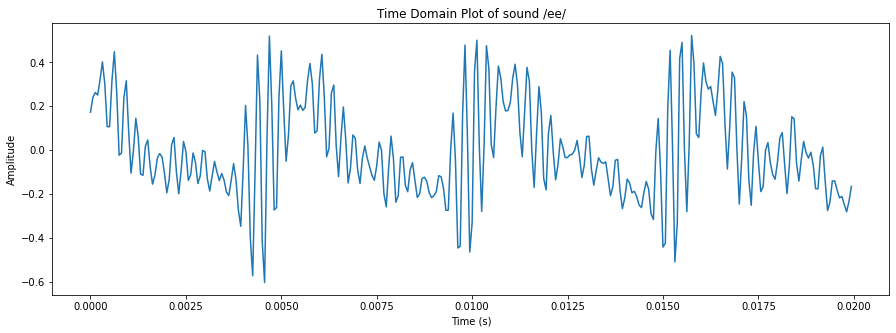

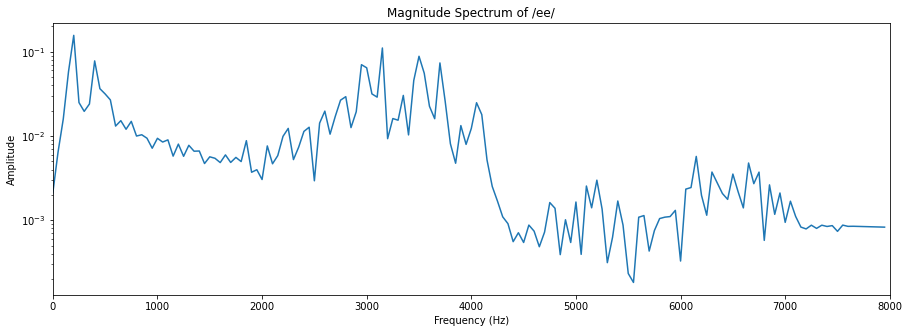

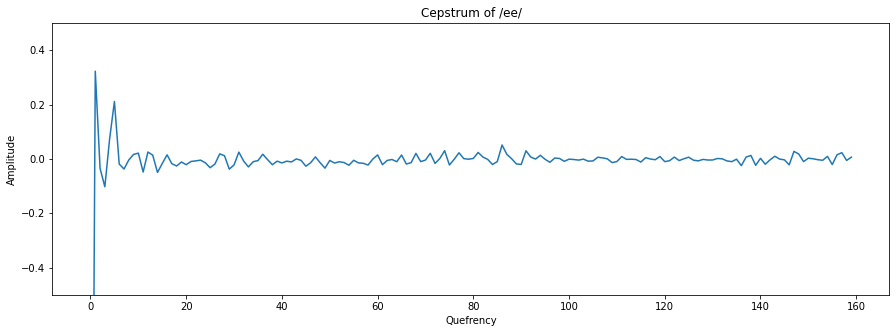

In [ ]:
# Plot the waveform, linear and log magnitude spectrum of /ee/
wave_plot(ee, t_ee, "ee")
plot_spectrum(ee, "ee", type='log')
plot_cepstrum(ee, "ee")

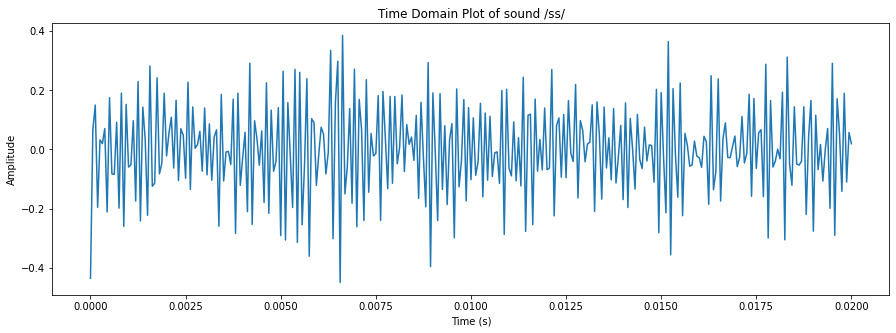

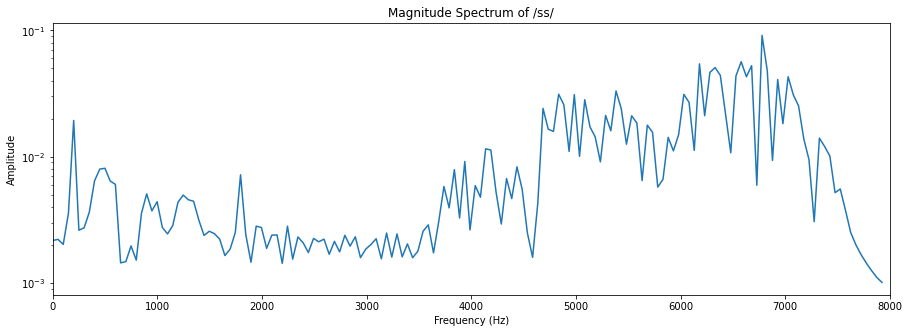

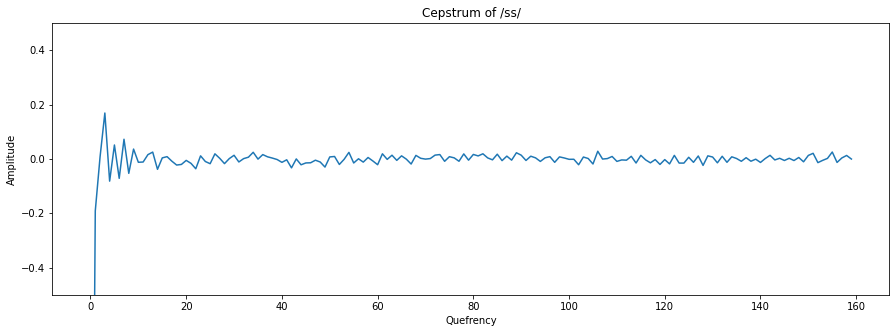

In [ ]:
# Plot the waveform, linear and log magnitude spectrum of /ss/
wave_plot(ss, t_ss, "ss")
plot_spectrum(ss, "ss", type='log')
plot_cepstrum(ss, "ss")

### **Observations**
1. Using the above defined procedure we look at the cepstrum for /ee/ sound. We observe a major peak in the higher quefrency region and infer that it is a voiced sound.
2. In case of the /ss/ sound, we do not find any such peak in the high quefrency region. So, we infer that it is an unvoiced sound.

## **Problem B**
Liftering:
1. Extract the deconvolved vocal tract component and excitation component from the cepstrum by liftering.
2. Write about how you used Low-Time Liftering and High-Time Liftering for extracting the above components.


### **Procedure**
1. Generate low-time and high-time lifters as given below.
2. Element wise multiply these lifters with the cepstrum of both sounds, to obtain vocal tract information and excitation information in both cases.

In [ ]:
cepstrum_ee = plot_cepstrum(ee, "ee", plot = False)
cepstrum_ss = plot_cepstrum(ss, "ss", plot = False)

In [ ]:
# Defining a low time lifter which preserves 13 low quefrency samples
low_time_lifter_ee = np.zeros(cepstrum_ee.shape[0])
low_time_lifter_ee[0:13] = 1
low_time_lifter_ee[-13:-1] = 1
low_time_lifter_ee[-1] = 1

low_time_lifter_ss = np.zeros(cepstrum_ss.shape[0])
low_time_lifter_ss[0:13] = 1
low_time_lifter_ss[-13:-1] = 1
low_time_lifter_ss[-1] = 1

In [ ]:
# Performing low time liftering on both cepstrums
low_lifter_ee = np.multiply(cepstrum_ee, low_time_lifter_ee)
low_lifter_ss = np.multiply(cepstrum_ss, low_time_lifter_ss)

[(-1.0, 1.5), Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Quefrency')]

<Figure size 720x720 with 0 Axes>

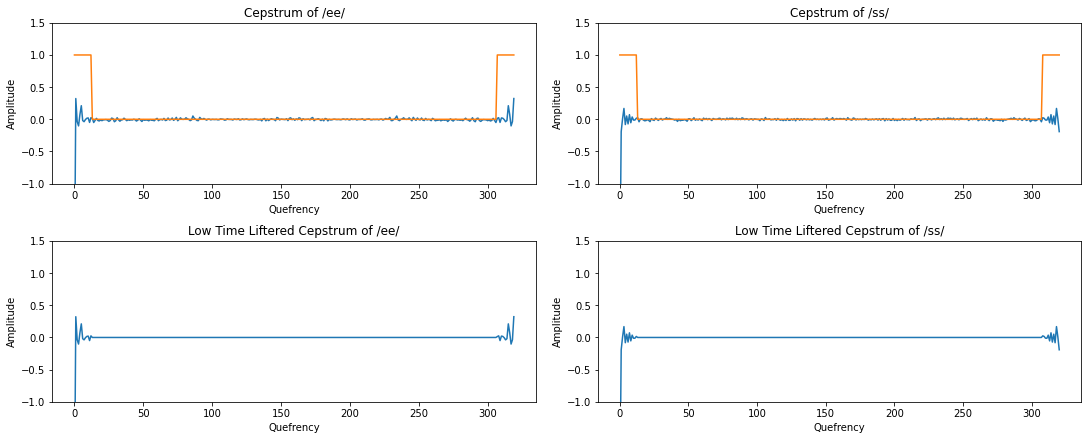

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(2, 2, figsize=(15,6), constrained_layout=True)
axs[0, 0].plot(cepstrum_ee)
axs[0, 0].plot(low_time_lifter_ee)
axs[0, 0].set_title('Cepstrum of /ee/')
axs[0, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))
axs[0, 1].plot(cepstrum_ss)
axs[0, 1].plot(low_time_lifter_ss)
axs[0, 1].set_title('Cepstrum of /ss/')
axs[0, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))

axs[1, 0].plot(low_lifter_ee)
axs[1, 0].set_title('Low Time Liftered Cepstrum of /ee/')
axs[1, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))
axs[1, 1].plot(low_lifter_ss)
axs[1, 1].set_title('Low Time Liftered Cepstrum of /ss/')
axs[1, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))

In [ ]:
# Defining a high time lifter which suppresses 13 low quefrency samples
high_time_lifter_ee = np.ones(cepstrum_ee.shape[0])
high_time_lifter_ee[0:13] = 0
high_time_lifter_ee[-13:-1] = 0
high_time_lifter_ee[-1] = 0

high_time_lifter_ss = np.ones(cepstrum_ss.shape[0])
high_time_lifter_ss[0:13] = 0
high_time_lifter_ss[-13:-1] = 0
high_time_lifter_ss[-1] = 0

In [ ]:
# Performing high time liftering on both cepstrums
high_lifter_ee = np.multiply(cepstrum_ee, high_time_lifter_ee)
high_lifter_ss = np.multiply(cepstrum_ss, high_time_lifter_ss)

[(-1.0, 1.5), Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Quefrency')]

<Figure size 720x720 with 0 Axes>

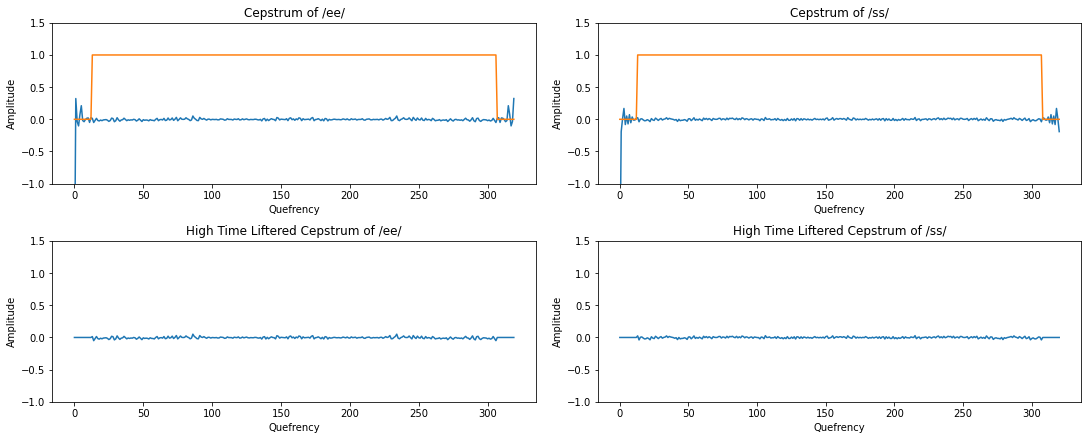

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(2, 2, figsize=(15,6), constrained_layout=True)
axs[0, 0].plot(cepstrum_ee)
axs[0, 0].plot(high_time_lifter_ee)
axs[0, 0].set_title('Cepstrum of /ee/')
axs[0, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))
axs[0, 1].plot(cepstrum_ss)
axs[0, 1].plot(high_time_lifter_ss)
axs[0, 1].set_title('Cepstrum of /ss/')
axs[0, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))

axs[1, 0].plot(high_lifter_ee)
axs[1, 0].set_title('High Time Liftered Cepstrum of /ee/')
axs[1, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))
axs[1, 1].plot(high_lifter_ss)
axs[1, 1].set_title('High Time Liftered Cepstrum of /ss/')
axs[1, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))

In [ ]:
f_ee, fft_ee = plot_spectrum(ee, 'ee', type='none')
f_ss, fft_ss = plot_spectrum(ss, 'ss', type='none')

f_v_ee, vocal_tract_ee = plot_spectrum(low_lifter_ee, "ee (Low Time Lifter)", type = 'none')
f_v_ss, vocal_tract_ss = plot_spectrum(low_lifter_ss, "ss (Low Time Lifter)", type = 'none')

f_ex_ee, excitation_ee = plot_spectrum(high_lifter_ee, "ee (Low Time Lifter)", type = 'none')
f_ex_ss, excitation_ss = plot_spectrum(high_lifter_ss, "ss (Low Time Lifter)", type = 'none')

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

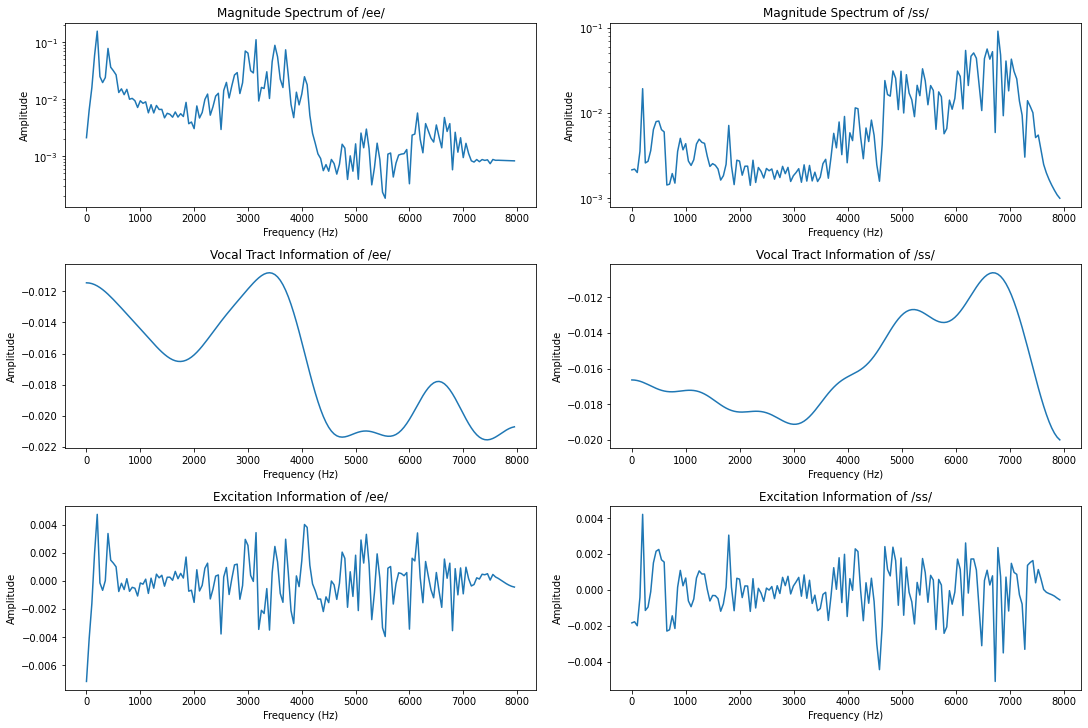

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(f_ee, np.abs(fft_ee))
axs[0, 0].set_title('Magnitude Spectrum of /ee/')
axs[0, 0].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')
axs[0, 1].plot(f_ss, np.abs(fft_ss))
axs[0, 1].set_title('Magnitude Spectrum of /ss/')
axs[0, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[1, 0].plot(f_v_ee, vocal_tract_ee.real)
axs[1, 0].set_title('Vocal Tract Information of /ee/')
axs[1, 0].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')
axs[1, 1].plot(f_v_ss, vocal_tract_ss.real)
axs[1, 1].set_title('Vocal Tract Information of /ss/')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

axs[2, 0].plot(f_ex_ee, excitation_ee.real)
axs[2, 0].set_title('Excitation Information of /ee/')
axs[2, 0].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')
axs[2, 1].plot(f_ex_ss, excitation_ss.real)
axs[2, 1].set_title('Excitation Information of /ss/')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

### **Observations**
1. We observe that the vocal tract information in both cases follows the log-magnitude spectrum closely, which is expected. 
2. We also observe that the excitation information contains the low frequency peaks exactly same as the log-magnitude spectrum.

## **Problem C**
Pitch estimation by cepstral analysis:
1. In the case of the voiced segment, estimate the pitch of the voiced speech segment using the cepstral analysis. Explain your procedure.


### **Procedure**
1. To estimate the pitch of the voiced speech segment using cepstral analysis we make use of the high-time liftered data.
2. As the high-time liftering gives us the excitation information, it contains the information of the pitch as well. 
3. We take the DFT of the high-time liftered signal to get excitation information.
4. Now we find the highest peak. The frequency value corresponding to this peak is the pitch frequency of the voiced speech segment.

In [ ]:
# Estimating the pitch of the voiced speech using excitation information
max_value_index = np.argmax(excitation_ee.real)
pitch_frequency = f_ex_ee[max_value_index]

print("Pitch of sound /ee/:", pitch_frequency, "Hz")

Pitch of sound /ee/: 200.0 Hz


## **Problem D**
Formant estimation by cepstral analysis:
1. Using liftered cepstrum, estimate the frequencies of the first three resonances of the vocal tract of the voiced speech frame.. Explain your procedure. Plot the log magnitude spectrum that shows the formant information (while not having the excitation information). 
2. Repeat the above for the unvoiced speech frame.


### **Procedure**
1. To estimate the frequencies of the first 3 resonances of the vocal tract of the voiced speech frame we make use of the low-time liftered signal. 
2. Take the DFT of the low-time liftered signal to obtain the vocal tract information.
3. Pick the first 3 peaks of the signal. The frequencies corresponding to these peaks are the formant frequencies of the voiced speech segment.
4. Plot the log-magnitude spectrum showing the formant information.

In [ ]:
# Peak picking for voiced sound /ee/
vocal_peaks_ee = signal.find_peaks(vocal_tract_ee.real)

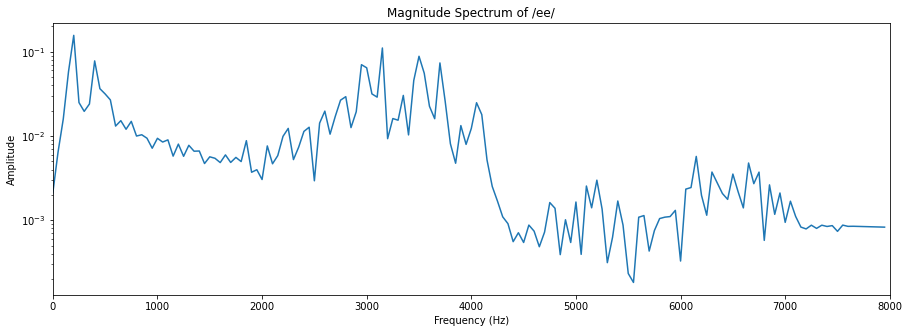

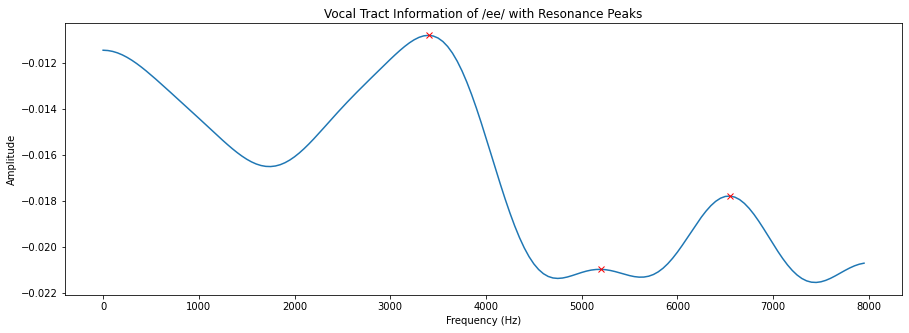

In [ ]:
# to plot the the log magnitude spectrum that shows the formant information
plot_spectrum(ee, "ee", type='log')

plt.figure(figsize=(15,5))
plt.plot(f_v_ee, vocal_tract_ee.real)
plt.plot(f_v_ee[vocal_peaks_ee[0]], vocal_tract_ee[vocal_peaks_ee[0]].real, 'x', c='r')
plt.title("Vocal Tract Information of /ee/ with Resonance Peaks")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Peak picking for unvoiced sound /ss/
vocal_peaks_ss = signal.find_peaks(vocal_tract_ss.real)

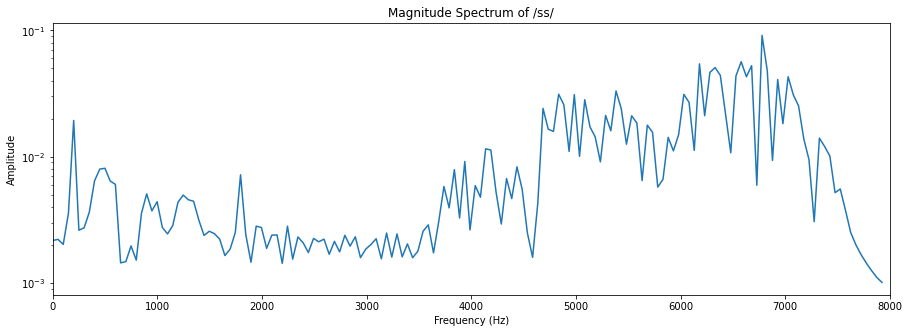

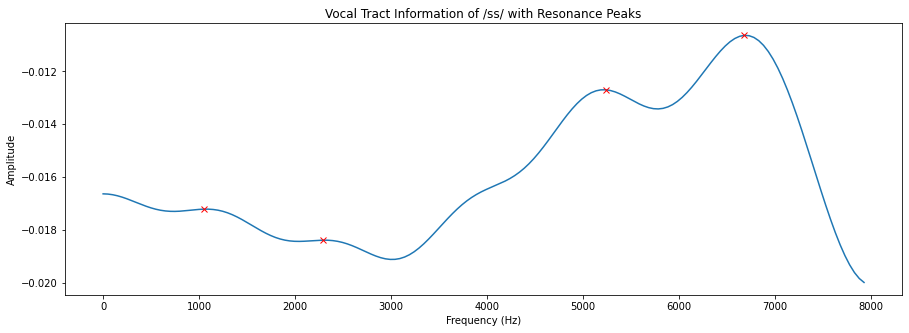

In [ ]:
# to plot the the log magnitude spectrum that shows the formant information
plot_spectrum(ss, "ss", type='log')

plt.figure(figsize=(15,5))
plt.plot(f_v_ss, vocal_tract_ss.real)
plt.plot(f_v_ss[vocal_peaks_ss[0]], vocal_tract_ss[vocal_peaks_ss[0]].real, 'x', c='r')
plt.title("Vocal Tract Information of /ss/ with Resonance Peaks")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()